Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [299]:
NAME = "pjmerica"  # your uniqname 
COLLABORATORS = c("aayushap","sohumm",  "kaspersj")  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

---

In [300]:
library(tidyverse)

# STATS 306
## Problem Set 9: Iteration & functional programming
 This problem set is due at 11:59pm on Wednesday, November 21 (you have two extra days to complete it).
 Each problem is worth two points, for a total of 20.

*Note*: you do not need to use `install.packages()` in this notebook. You may assume that we have already installed all of the necessary packages when we run your code.

#### Problem 1
Each of the following problems has a `for` loop that performs some computation on a list called `input` and stores the result in a variable called `output`. Your job is to rewrite this code using a single call to one of the functional programming methods like `map/map2`, `accumulate` or `reduce`.

##### Function 1
```{r}
output = vector("list", length(input) - 1)
for (i in seq_along(input[-1])) {
    output[[i]] = input[[i + 1]] - input[[i]]
}
```

In [301]:
func1 = function(x,y){x - y}

In [302]:
set.seed(1)
input <- rnorm(n = 100)
# Your output
output <- map2(input[-1], input[-length(input)], func1)
# Test output
for (i in seq_along(input[-1])) {
    stopifnot(near(output[[i]], input[[i + 1]] - input[[i]]))
}

##### Function 2
```{r}
output = 1
for (x in input) {
    output <- output * .1
    output <- output + .9 * x
}
```

In [303]:
func2 = function(x,y){ (( x * .1) + .9*y) }

In [304]:
output <- 1
for (x in input) {
    output <- output * .1
    output <- output + .9 * x
}
stopifnot(near(output, reduce(input, func2)))

#### Problem 2
We define the *special digit* of a non-negative integer $x$ as follows:
* If $x$ has only one digit, then its special digit is $x$ itself.
* Otherwise, the special digit of $x$ is equal to the special digit of the [digit sum](https://en.wikipedia.org/wiki/Digit_sum) (the sum of all of the digits) of $x$.

For example,
```
special_digit(199) = special_digit(1 + 9 + 9)
                   = special_digit(19)
                   = special_digit(1 + 9)
                   = special_digit(10)
                   = special_digit(1 + 0)
                   = special_digit(1)
                   = 1.
```
Implement the function `special_digit(x)`.

In [305]:
sum_bot = function(x){
    i = 0
    sum = 0
    a = 5
    
    while(x %% 10 == 0){
        x = x/10
    }
    while(a>0){
        a = floor(x * (1/(10^i))) %% 10
        i = i + 1
        sum = sum + a
    }
    return(sum)
}




special_digit = function(x) {
 if (x < 10){
        return(x)
  }
   x= sum_bot(x)
while(x > 9){
        x = sum_bot(x)
            }
    return(x)
}



In [306]:
stopifnot(special_digit(199) == 1)
stopifnot(special_digit(0) == 0)
stopifnot(special_digit(60) == 6)

#### Problem 3
Write a function `call_until(f, g)` which takes two function arguments `f` and `g` and does the following:
1. Repeatedly calls `f()` until `f` returns the same value three times in a row.
2. Calls `g()`:
    1. If `g` returns the same value that `f()` returned three times in a row in step one, then `call_until` returns this value.
    2. Otherwise, `call_until` goes back to step 1 and the process repeats.

In [307]:
call_until = function(f, g) {
    same = FALSE
  
    while(same != TRUE) {
        value = f()
        value_count = 1
        
        while(value_count < 3) {
            next_value = f()
            
            if (next_value == value) {
                value_count = value_count + 1
            } 
            
            else {
                value = next_value
                value_count = 1
                }
            
            }
        
        if (value == g()) {
            same = TRUE
            }
        
        }
    return(value)
    }


In [308]:
i = 0
f = function() {
    i <<- i + 1
    i < 10
}
g = function() {
    TRUE
}
stopifnot(call_until(f, g))
stopifnot(i == 3)

i = 0
set.seed(1)
f = function() {
    i <<- i + 1
    sample(1:8, 1)
}
j = 0
g = function() {
    j <<- j + 1
    sample(1:5, 1)
}
stopifnot(call_until(f, g) == 5)
stopifnot(i == 137)
stopifnot(j == 2)


#### Problem 4
Write a function `gcd(v)` which, given a vector of non-negative integers, returns their greatest common divisor. For example:
```{r}
> gcd(c(2,4,6,8))
[1] 2
> gcd(c(4,8,12))
[1] 4
> gcd(c(4,8,13))
[1] 1
```

In [309]:
gcd = function(v) {
      v = sort(v)
      a = 1
      for(i in 1:v[1]){
        for(j in 1:length(v)){
          sum = sum((v %% i))
          }
         if( sum == 0  & i >= a){
             a = i
         }
        else{
            a = a
        }
    }
    return(a)
      }

In [310]:
stopifnot(gcd(1) == 1)
stopifnot(gcd(c(2, 1)) == 1)
stopifnot(gcd(c(4, 8, 12)) == 4)
stopifnot(gcd(c(4, 8, 13)) == 1)

### Number triangles
A *$\alpha$-number triangle* is an triangular array of numbers such that
1. The $n$-th row has $n$ numbers indexed by $k=1,\dots,n$.
2. The first and last entry (i.e. $k=1$ and $k=n$) of each row equal a fixed number $\alpha$, and
2. The remaining interior entries are obtained by adding up the entries above and to the left and right of it in the preceding row.

For example, setting $a=1$ produces [Pascal's triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle):

![Pascal's triangle](https://upload.wikimedia.org/wikipedia/commons/c/ca/Pascal_triangle_small.png)

The second entry of the third row is $2=1+1$ and the second entry of the fifth row is $4=1+3$.

#### Problem 5
Write a function `f_nt(n, k, alpha)` which computes the $k$-th entry of the $n$-th row of the $\alpha$-number triangle. Thus, using from the examples above, we would have

```{r}
> f_nt(3, 2, 1)
[1] 2
> f_nt(5, 2, 1)
[1] 4
> f_nt(1, 1, 1)
[1] 1
> f_nt(8, 7, 1)
[1] 7
```

If $k<0$ or $k>n$ then the function should return $0$. You may assume when we test your code that $0 \le n\le 20$ and $0 \le \alpha \le 10$. 

In [311]:
f_nt = function(n, k, alpha) {
    if(k<0 | k>n) {
        return(0)
    }
    if(k ==1 | k == n){
        return(alpha)
    }
    return(f_nt(n-1, k-1, alpha) + f_nt(n - 1, k, alpha))
}

In [312]:
for (n in 1:10)  {
    for (k in 1:(n+1)) {
        stopifnot(choose(n, k) == f_nt(n + 1, k + 1, 1))
    }
}

#### Problem 6
If $n$ is large then then your function `f_nt` will run very slowly, or even crash. Write a function `f_nt_memo(n, k, alpha)` which uses memoization to efficiently compute the anser for large $n$. We will test your function on values of $n$ ranging from 1 to 200, and $\alpha$ from 1 to 10. The memoization data structure has been allocated for you:

In [313]:
memo = array(NA_integer_, dim = c(200, 200, 20)) # access using: memo[n, k, alpha]

In [314]:
f_nt_memo = function(n, k, alpha) {
    if(k<0 | k>n) {
        return(0)
    }
    if(k ==1 | k == n){
        return(alpha)
    }
    if(is.na(memo[n,k,alpha])){
        memo[n,k,alpha] <<- f_nt_memo(n-1, k-1, alpha) + f_nt_memo(n-1, k , alpha)
    }
    return(memo[n, k, alpha])
}

In [315]:
for (n in 1:15) {
    for (k in 1:n) {
        for (alpha in 1:10) {
            stopifnot(f_nt_memo(n, k, alpha) == f_nt(n, k, alpha))
            stopifnot(f_nt_memo(n, k, alpha) == alpha * choose(n - 1, k - 1))
        }
    }
}
stopifnot(near(f_nt_memo(150, 50, 13), 8.72242e+40, tol=1e41))


### Facebook Data
Many Facebook users report feeling like "my friends have more friends than I do". In this problem we investigate that phenomenon.

The file `fb.RData` represents friend data from about 4000 facebook users.

In [316]:
load("fb.RData")
fb %>% print

# A tibble: 88,234 x 2
   user_id friend_id
     <int>     <int>
 1       0         1
 2       0         2
 3       0         3
 4       0         4
 5       0         5
 6       0         6
 7       0         7
 8       0         8
 9       0         9
10       0        10
# ... with 88,224 more rows


The first column represents a user id, and the second column represents the ids of all of that user's friends. (The real user id's have been replaced by integers to preserve anonymity.) The number of friends each user has is:

In [317]:
fb %>% count(user_id) %>% print

# A tibble: 3,663 x 2
   user_id     n
     <int> <int>
 1       0   347
 2       1    16
 3       2     9
 4       3    16
 5       4     9
 6       5    12
 7       6     5
 8       7    19
 9       8     7
10       9    55
# ... with 3,653 more rows


#### Problem 7
Since we are going to do a lot of looping and filtering over this dataset, we will first store it in a format that allows us to efficiently access all of the friends of a given user id.

Convert the `fb` tibble to a list of integer vectors, and store it as a variable called `fb_lst`. Each named entry of the list represents one user id. The entries themselves contain all of that user's friends:
```{r}
> fb_lst[1:5] %>% str
List of 5
 $ 0: int [1:347] 1 2 3 4 5 6 7 8 9 10 ...
 $ 1: int [1:16] 48 53 54 73 88 92 119 126 133 194 ...
 $ 2: int [1:9] 20 115 116 149 226 312 326 333 343
 $ 3: int [1:16] 9 25 26 67 72 85 122 142 170 188 ...
 $ 4: int [1:9] 78 152 181 195 218 273 275 306 328
```
Hence, to access all of the friends of a given user id, we can simply index into `fb_lst`:
```{r}
> filter(fb, user_id == 1111)
  user_id friend_id
1 1111    1197     
2 1111    1368     
3 1111    1788  
> fb_lst[['1111']]
[1] 1197 1368 1788
```
(The second command is much faster, because the `filter()` operation must examine every row of `fb`.)

<small>
    (Note that the keys given to `fb_lst` must be strings. R will interpret `fb_lst[[1111]]` as the 1111th entry in `fb_lst`, which does not correspond to user id 1111:

```{r}
> fb_lst[1111]
$`1250`
  [1] 1255 1256 1271 1278 1287 1288 1293 1330 1335 1339 1340 1341 1344 1352 1367
 [16] 1375 1376 1380 1390 1399 1402 1416 1420 1431 1435 1456 1488 1491 1522 1524
 [31] 1530 1532 1547 1554 1557 1559 1572 1584 1589 1597 1600 1603 1608 1610 1612
 [46] 1613 1617 1619 1620 1622 1623 1632 1644 1652 1653 1659 1662 1663 1683 1685
 [61] 1688 1689 1707 1712 1714 1717 1721 1724 1730 1736 1737 1741 1746 1750 1752
 [76] 1754 1757 1765 1768 1771 1789 1793 1795 1796 1799 1800 1804 1810 1816 1819
 [91] 1827 1833 1839 1849 1861 1867 1877 1879 1888 1902
```
 )
</small>

In [318]:
max = max(fb$user_id)
friends = fb %>% filter(user_id == 1) %>% .$friend_id
fb_lst = list()
for(i in 0:max){
    b = as.character(i)
    fb_lst[[b]] = fb %>% filter(user_id == i) %>% .$friend_id
}


In [319]:
stopifnot(all(fb_lst[["1111"]] == c(1197, 1368, 1788)))

#### Problem 8
The first user in this data set, user_id 0, has 347 friends. The next user (uid 1) has 16 friends. Using `fb_lst`' define an integer vector `n_friends` whose entries store the number friends that each user id has in the `fb` data set:
```{r}
> n_friends[1:5] %>% str
  0   1   2   3   4 
347  16   9  16   9 
```
(As with `fb_lst`, the names of this vector correspond to user ids.)

(*Hint*: This is a one-liner.)

In [320]:

n_friends = map_dbl(fb_lst, function(x) length(x)) 


In [321]:
stopifnot(exists("n_friends"))
stopifnot(n_friends[["0"]] == 347L)
stopifnot(n_friends[["1"]] == 16L)

#### Problem 9
Create a vector `n_friends2` containing the number of friends that each user's friends have. This vector should have one entry for each relationship in the original `fb` table, i.e. 88324 entries in total. For example, the first friend of the first user in `fb` is user id 1:

In [322]:
fb %>% head(1)

user_id,friend_id
0,1


User 1 has 16 friends:

In [323]:
fb_lst[["1"]] %>% length

[1] 16

Hence, the first entry of n_friends2 should be 16.

Your solution should use `n_friends` and `fb_lst`, but not the original `fb` table.

(*Hint*: There is a one-line solution that does not require using loops or `map`.)

In [324]:

n_friends2 = c()
for(i in 1:length(fb_lst)){ n_friends2 = c(n_friends2, map(fb_lst[[i]] , function(x) n_friends[as.character(x)]))   }


In [325]:
stopifnot(length(n_friends2) == 88234)
stopifnot(all(n_friends2[1:10] == c(16, 9, 16, 9, 12, 5, 19, 7, 55, 9)))

#### Problem 10
Use `stat_ecdf` to plot the empirical cumulative distribution functions of `n_friends` and `n_friends2`, and interpret the plot. Explain what differences, if any, exist between the number of friends a Facebook user has, and the number of friends her friend(s) have. Explain why those differences exist: why should it be that your friends have more friends than you do?

(Your plot should look something like:
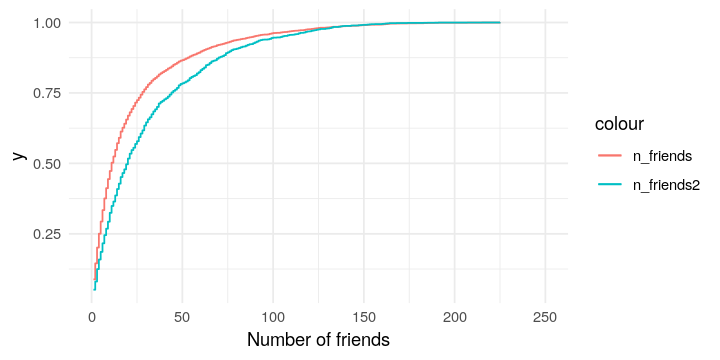

Warning message:
“Removed 56 rows containing non-finite values (stat_ecdf).”

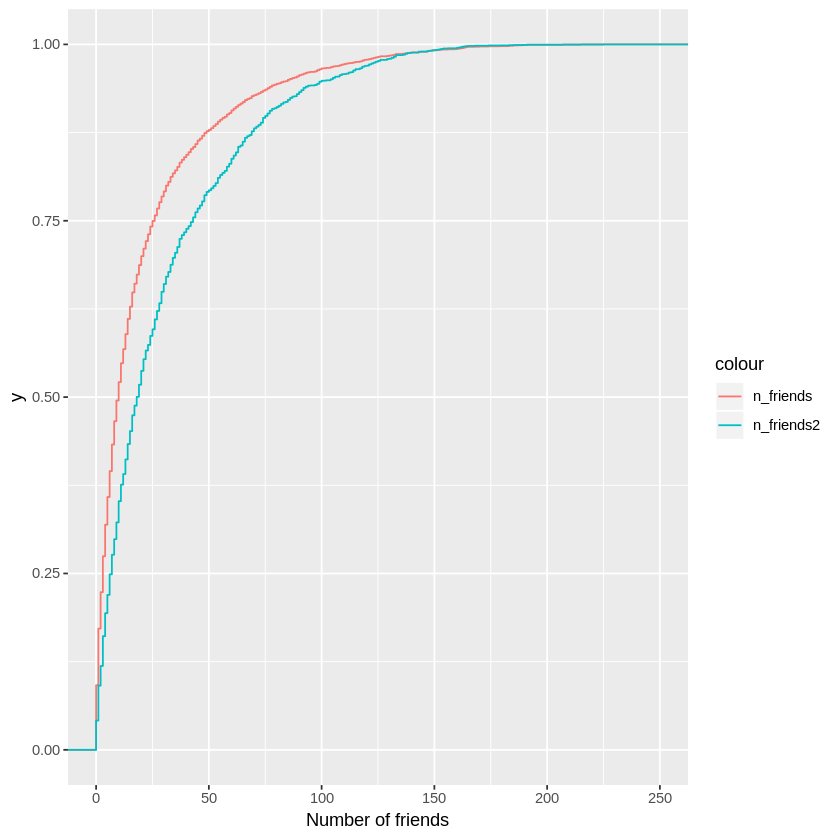

In [326]:
no_new_friends = data.frame(x = unlist(n_friends), colour ="n_friends")
Im_still_down_with_my_day_ones = data.frame(x = unlist(n_friends2), colour = "n_friends2")
newdf = rbind(no_new_friends, Im_still_down_with_my_day_ones)

ggplot(data=newdf, mapping = aes(x=x, color = colour)) + stat_ecdf() +  xlim(c(0,250)) + xlab("Number of friends") 